#  **1)INTRODUCTION**
  dealing with bio-degradable and non-biodegradable data where waste are beign seggregated by taking photo as input and counting how many stuff fall under    bio-degradable and non-biodegradable . 
  

# **2)Preparation of data** 


In [38]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

**Preparing dataset** 

In [39]:
data_dir = "../input/waste-dataset/dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('../input/waste-dataset/dataset')

**seperating categories**

In [40]:
biodegradable = list(data_dir.glob('biodegradable/*'))[:600]
cardboard = list(data_dir.glob('cardboard/*'))[:600]
electronics = list(data_dir.glob('electronic/*'))[:600]
glass = list(data_dir.glob('glass/*'))[:600]
metal = list(data_dir.glob('metal/*'))[:600]
paper = list(data_dir.glob('paper/*'))[:600]
plastic = list(data_dir.glob('plastic/*'))[:600]
trash = list(data_dir.glob('trash/*'))[:600]

**Checking samples**

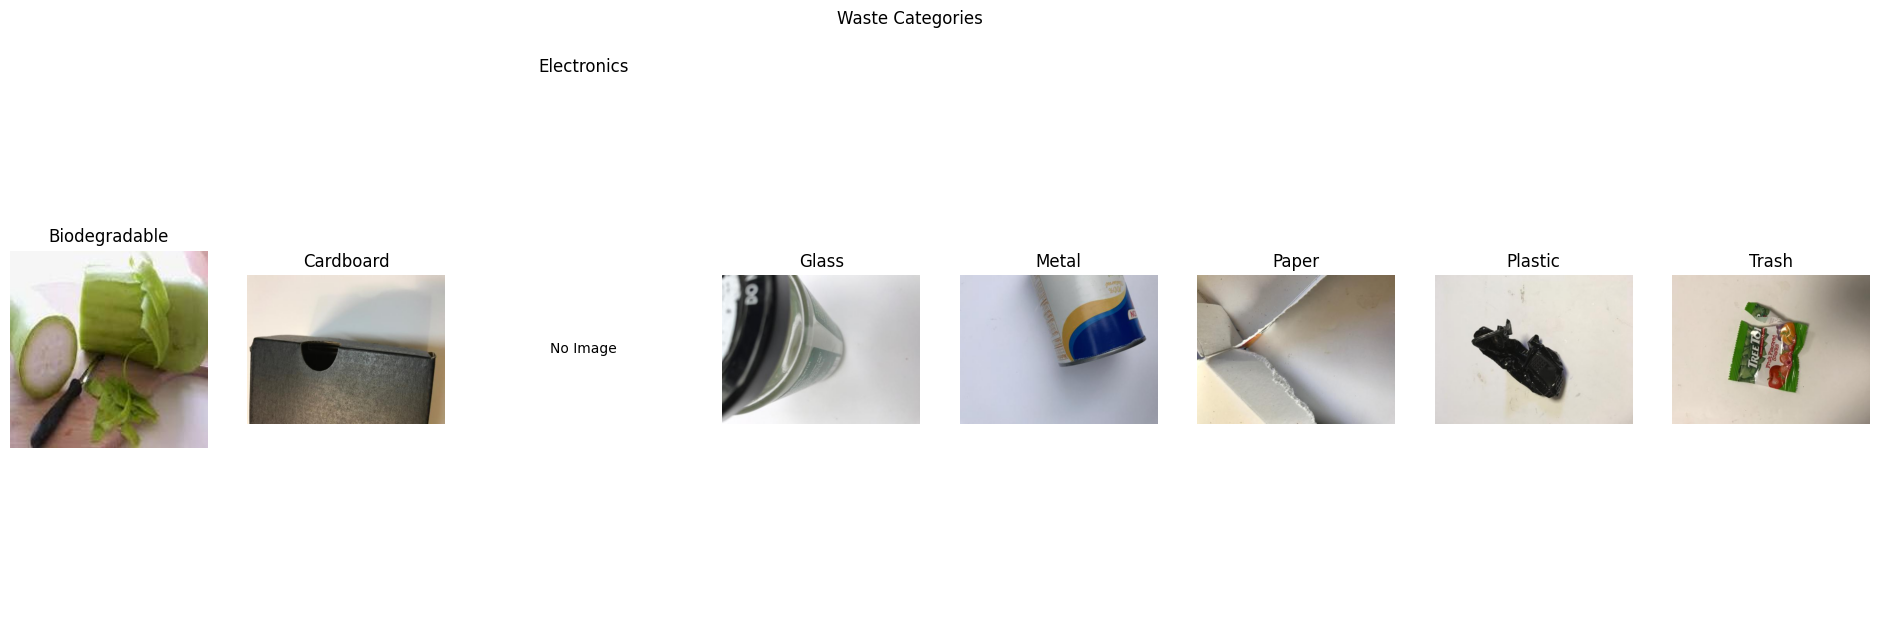

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pathlib

# Load image paths from each waste category
biodegradable = list(data_dir.glob('biodegradable/*'))[:600]
cardboard = list(data_dir.glob('cardboard/*'))[:600]
electronics = list(data_dir.glob('electronic/*'))[:600]
glass = list(data_dir.glob('glass/*'))[:600]
metal = list(data_dir.glob('metal/*'))[:600]
paper = list(data_dir.glob('paper/*'))[:600]
plastic = list(data_dir.glob('plastic/*'))[:600]
trash = list(data_dir.glob('trash/*'))[:600]

# Create a figure with subplots to display images from each category
fig, ax = plt.subplots(ncols=8, figsize=(24, 7))
fig.suptitle('Waste Categories')

# Helper function to display images if available, otherwise display a blank subplot
def display_image(category_list, index, title):
    if len(category_list) > 0:
        image = img.imread(category_list[0])
        ax[index].imshow(image)
    else:
        ax[index].text(0.5, 0.5, 'No Image', horizontalalignment='center', verticalalignment='center')
    ax[index].set_title(title)
    ax[index].axis('off')

# Display images or placeholders for each category
display_image(biodegradable, 0, 'Biodegradable')
display_image(cardboard, 1, 'Cardboard')
display_image(electronics, 2, 'Electronics')
display_image(glass, 3, 'Glass')
display_image(metal, 4, 'Metal')
display_image(paper, 5, 'Paper')
display_image(plastic, 6, 'Plastic')
display_image(trash, 7, 'Trash')

plt.show()


**Assigning a separate dictionary for images and their corresponding labels**

In [42]:
# Contains the images path for each waste category
df_images = {
    'biodegradable' : biodegradable,
    'cardboard'     : cardboard,
    'electronics'   : electronics,
    'glass'         : glass,
    'metal'         : metal,
    'paper'         : paper,
    'plastic'       : plastic,
    'trash'         : trash
}

# Contains numerical labels for the categories
df_labels = {
    'biodegradable' : 0,
    'cardboard'     : 1,
    'electronics'   : 2,
    'glass'         : 3,
    'metal'         : 4,
    'paper'         : 5,
    'plastic'       : 6,
    'trash'         : 7
}

# Verify the structure
print(df_images)
print(df_labels)


{'biodegradable': [PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_2091.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_1805.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_38.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_1473.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_1038.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_1663.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_411.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_2089.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_2443.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_2017.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST_BIODEG_ORI_1287.jpg'), PosixPath('../input/waste-dataset/dataset/biodegradable/TEST

**Since the MobileNetv2 training images dimensions are 224 by 224 by 3, we have to reshape our categories into that**

In [43]:
import cv2
import numpy as np

# Example: Reshaping one image (arborio category)
img = cv2.imread(str(df_images['biodegradable'][0]))  # Load the first image from 'biodegradable' category
print("Original shape:", img.shape)  # Print the original dimensions

# Resize the image to 224x224 (MobileNetV2 required dimensions)
resized_img = cv2.resize(img, (224, 224))

print("Reshaped dimensions:", resized_img.shape)  # Print the new dimensions

# Converting the image to numerical array
resized_img = np.array(resized_img)

# Repeat the resizing for all images in the dataset
def resize_images(image_list, target_size=(224, 224)):
    resized_images = []
    for image_path in image_list:
        img = cv2.imread(str(image_path))
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return np.array(resized_images)

# Reshape all categories to 224x224
resized_biodegradable = resize_images(df_images['biodegradable'])
resized_cardboard = resize_images(df_images['cardboard'])
resized_electronics = resize_images(df_images['electronics'])
resized_glass = resize_images(df_images['glass'])
resized_metal = resize_images(df_images['metal'])
resized_paper = resize_images(df_images['paper'])
resized_plastic = resize_images(df_images['plastic'])
resized_trash = resize_images(df_images['trash'])

# Example: Display the shape of one resized image category
print("Reshaped biodegradable image set shape:", resized_biodegradable.shape)


Original shape: (200, 200, 3)
Reshaped dimensions: (224, 224, 3)
Reshaped biodegradable image set shape: (600, 224, 224, 3)


In [44]:
import cv2
import numpy as np

# X will hold the images, y will hold the corresponding labels
X, y = [], []

# Iterate through each category and its images
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))  # Load the image
        if img is not None:  # Check if the image is loaded correctly
            resized_img = cv2.resize(img, (224, 224))  # Resize to 224x224
            X.append(resized_img)  # Append resized image to X
            y.append(df_labels[label])  # Append the label to y

# Convert X and y to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

# Example: Display the shapes of X and y
print("X shape (images):", X.shape)  # Should be (num_images, 224, 224, 3)
print("y shape (labels):", y.shape)  # Should be (num_images,)


X shape (images): (3137, 224, 224, 3)
y shape (labels): (3137,)


**Splitting the data and standarization**

In [45]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [46]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# 3)**Creating the model**

In [47]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [48]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Number of labels in the dataset
num_label = 8  # e.g., 'biodegradable', 'cardboard', etc.

# Load the pre-trained MobileNetV2 without the top classification layer
mobile_net = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the MobileNetV2 base model
mobile_net.trainable = False

# Create the full model using MobileNetV2 as the base
model = keras.Sequential([
    mobile_net,                        # MobileNetV2 as base
    GlobalAveragePooling2D(),           # Global pooling to reduce the dimensions
    Dense(num_label, activation='softmax')  # Final classification layer with 'num_label' outputs
])

# Display the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

# 4) **Training the Model**

In [49]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import Sequential
import tensorflow as tf

# Number of labels (categories)
num_label = 8  # If there are 7 distinct categories

# Define the model
model = Sequential([
    mobile_net,  # Pretrained MobileNetV2 model
    GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
    Dense(num_label, activation='softmax')  # Output layer with 7 categories
])

# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Using softmax so from_logits=False
    metrics=['acc']  # Accuracy as a performance metric
)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# After training, you can plot or analyze the history object for the results


Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 74s 913ms/step - acc: 0.4681 - loss: 1.4364 - val_acc: 0.7868 - val_loss: 0.6266
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 878ms/step - acc: 0.8006 - loss: 0.5617 - val_acc: 0.8325 - val_loss: 0.4844
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 884ms/step - acc: 0.8571 - loss: 0.4250 - val_acc: 0.8579 - val_loss: 0.4259
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 67s 906ms/step - acc: 0.8914 - loss: 0.3413 - val_acc: 0.8629 - val_loss: 0.4131
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 882ms/step - acc: 0.9182 - loss: 0.2918 - val_acc: 0.8782 - val_loss: 0.3894
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 66s 895ms/step - acc: 0.9228 - loss: 0.2594 - val_acc: 0.8782 - val_loss: 0.3885
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 81s 886ms/step - acc: 0.9380 - loss: 0.2258 - val_acc: 0.8477 - val_loss: 0.4283
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 879ms/step - acc: 0.9404 - loss: 0.2178 - val_acc: 0.8832 - val_loss: 0.3617
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 878ms/

# 5)**Evaluate the Model**

In [50]:
# Check the unique labels in the dataset
print(set(y_train))

{0, 1, 3, 4, 5, 6, 7}


In [51]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 786ms/step - acc: 0.7994 - loss: 0.5176
Test Loss: 0.49666041135787964
Test Accuracy: 0.8163265585899353


In [52]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.87      0.87      0.87        63
           3       0.72      0.77      0.74       105
           4       0.82      0.88      0.85        78
           5       0.84      0.86      0.85       114
           6       0.75      0.69      0.72       101
           7       0.50      0.34      0.41        29

    accuracy                           0.82       588
   macro avg       0.78      0.77      0.78       588
weighted avg       0.81      0.82      0.81       588



# 6)Visualizing the Model

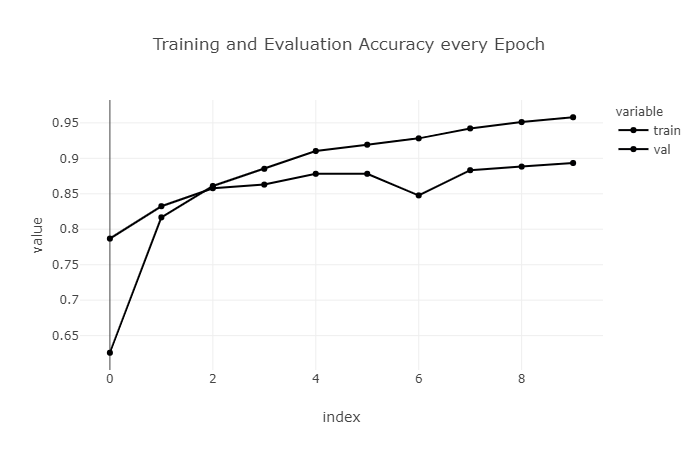

In [53]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

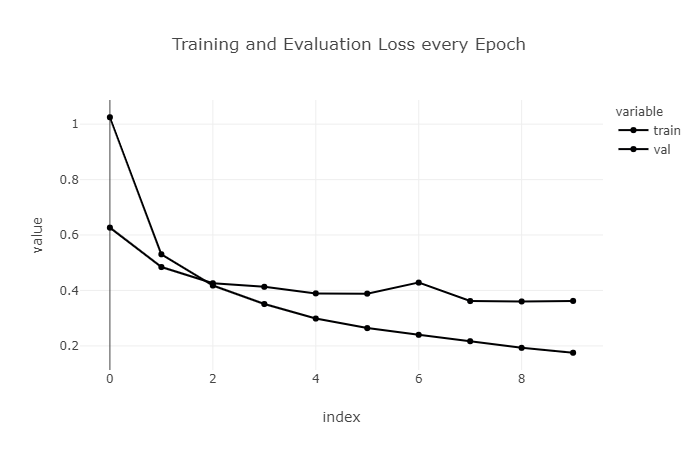

In [54]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()

# 7)**Model Deployment**

In [ ]:
model.save('waste_classification_model.h5')

In [ ]:
!pip install streamlit tensorflow opencv-python

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from PIL import Image
import io
import cv2
import streamlit as st

# Load your trained model (Make sure to upload your model file to Kaggle)
model = tf.keras.models.load_model('/kaggle/input/your-model-path/model.h5')

# Waste categories
waste_categories = ['plastic', 'paper', 'glass', 'metal', 'organic', 'other', 'e-waste']

# Function to preprocess image
def preprocess_image(image):
    image = image.resize((224, 224))  # Resize the image to the input size of the model
    image_array = np.array(image) / 255.0  # Normalize the image
    return np.expand_dims(image_array, axis=0)  # Expand dimensions to match model input

# Function to predict waste category for a single image
def predict_waste(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    return prediction


In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Waste Classification App</title>
    <style>
        body {
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Waste Classification App</h1>
    <input type="file" accept="image/*" id="photoInput">
    <button onclick="submitPhoto()">Submit Photo</button>
    <h2 id="result"></h2>

    <script>
        // Function to submit photo
        function submitPhoto() {
            const input = document.getElementById('photoInput');
            const file = input.files[0];

            if (file) {
                const formData = new FormData();
                formData.append('image', file);

                fetch('/classify', {
                    method: 'POST',
                    body: formData
                })
                .then(response => response.json())
                .then(result => {
                    document.getElementById('result').innerText = `Prediction: ${result.category}`;
                })
                .catch(error => console.error('Error:', error));
            }
        }
    </script>
</body>
</html>


In [ ]:
from flask import Flask, request, jsonify

# Initialize Flask app
app = Flask(__name__)

@app.route('/classify', methods=['POST'])
def classify():
    if 'image' not in request.files:
        return jsonify({'error': 'No image provided'}), 400

    file = request.files['image']
    image = Image.open(file.stream)

    # Predict waste category
    prediction = predict_waste(image)
    category = waste_categories[np.argmax(prediction)]

    return jsonify({'category': category})

# Run the Flask app
if __name__ == '__main__':
    app.run(port=5000)


In [ ]:
!pip install streamlit
!streamlit run app.py &  # Run your Streamlit application
